In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib. pyplot as plt
from pygmo import *
from mpl_toolkits.mplot3d import Axes3D
import methods_updated as mtb
%matplotlib inline

In [62]:
def read_execution_times(file_path):
    file = open(file_path, 'r')
    file_lines = file.readlines()
    
    return [int(time) for time in file_lines]

def plot_hypervolume_convergence(file_path, folder, file, dimension, reference_point=None, plot=True):
    number_of_executions = 10
    file_path = file_path
    hv_df = pd.DataFrame()

    for i in range(number_of_executions):
        file_name = file + str(i) + '.txt'

        f = open(os.path.join(file_path, folder, file_name),'r',encoding='utf-8')
        print(os.path.join(file_path, folder, file_name))
        data = f.readlines()
        splitted_data = ' '.join([i for i in data]).split('#\n')
        splitted_data = [i for i in splitted_data if len(i) > 1]

        hv_pareto = []
        indexes = []
        for k in range(len(splitted_data)):
            converted = [i.strip().split(',') for i in splitted_data[k].split('\n') if len(i) > 1]
            pop = [[float(j) for j in i] for i in converted]
            hv = hypervolume(pop)
            if reference_point is None:
                hv_pareto.append(hv.compute([200000,150000,150000,150000,150000,150000,150000,1]))
            else:
                hv_pareto.append(hv.compute(reference_point))
            indexes.append(100*k)
        df = pd.DataFrame(data=[indexes, hv_pareto]).T
        columns_string = 'Evaluation HV'+str(i)
        df.columns = columns_string.split()
        hv_df = pd.concat([hv_df, df[columns_string.split()[1]]], axis=1, sort=False)
    if plot:
    	hv_df.T.mean().plot(x='Evaluation', y='HV',figsize=(10,8))
    return hv_df.T.mean(), hv_df

In [64]:
current_test = 'tests/test17'
instance = 'r100n12tw10k4'

Results_2020/tests/test17/ONMOEAD_KENDALL/r100n12tw10k4/onmoead_kendall-original-pareto-normalized-execution-0.txt
Results_2020/tests/test17/ONMOEAD_KENDALL/r100n12tw10k4/onmoead_kendall-original-pareto-normalized-execution-1.txt
Results_2020/tests/test17/ONMOEAD_KENDALL/r100n12tw10k4/onmoead_kendall-original-pareto-normalized-execution-2.txt
Results_2020/tests/test17/ONMOEAD_KENDALL/r100n12tw10k4/onmoead_kendall-original-pareto-normalized-execution-3.txt
Results_2020/tests/test17/ONMOEAD_KENDALL/r100n12tw10k4/onmoead_kendall-original-pareto-normalized-execution-4.txt
Results_2020/tests/test17/ONMOEAD_KENDALL/r100n12tw10k4/onmoead_kendall-original-pareto-normalized-execution-5.txt
Results_2020/tests/test17/ONMOEAD_KENDALL/r100n12tw10k4/onmoead_kendall-original-pareto-normalized-execution-6.txt
Results_2020/tests/test17/ONMOEAD_KENDALL/r100n12tw10k4/onmoead_kendall-original-pareto-normalized-execution-7.txt
Results_2020/tests/test17/ONMOEAD_KENDALL/r100n12tw10k4/onmoead_kendall-original

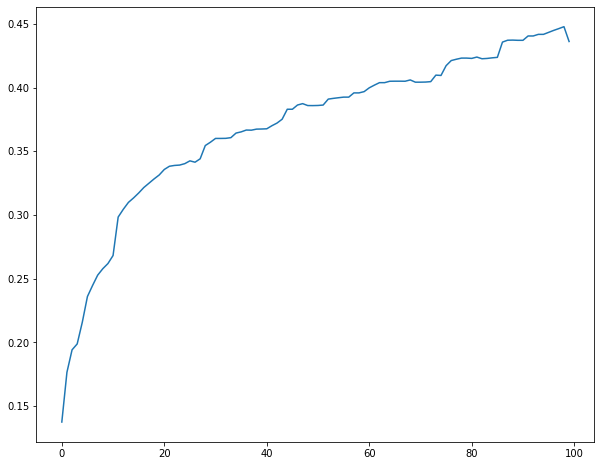

In [65]:
file = 'onmoead_kendall-original-pareto-normalized-execution-'
time_file = 'onmoead_kendall-execution_times.csv'
reference_point = [1.1, 1.1, 1.1, 1.1, 1.15, 1.1, 1.13, 1.1]
algorithm_folder = 'ONMOEAD_KENDALL'
algorithm_name_1 = r'OnCL$\tau$-MOEA/D'
times_1 = read_execution_times(os.path.join('Results_2020', current_test , algorithm_folder, instance, time_file))
hv_moead_kendall_r050, hv_moead_kendall_r050_df = plot_hypervolume_convergence(
    os.path.join('Results_2020', current_test , algorithm_folder, instance),
    folder='',
    file=file,
    reference_point=reference_point,
    dimension=8,
    plot=True)

# Off-MOEA/D

Results_2020/tests/test17/MOEAD_R2/r100n12tw10k4/moead_r2-original-pareto-normalized-execution-0.txt
Results_2020/tests/test17/MOEAD_R2/r100n12tw10k4/moead_r2-original-pareto-normalized-execution-1.txt
Results_2020/tests/test17/MOEAD_R2/r100n12tw10k4/moead_r2-original-pareto-normalized-execution-2.txt
Results_2020/tests/test17/MOEAD_R2/r100n12tw10k4/moead_r2-original-pareto-normalized-execution-3.txt
Results_2020/tests/test17/MOEAD_R2/r100n12tw10k4/moead_r2-original-pareto-normalized-execution-4.txt
Results_2020/tests/test17/MOEAD_R2/r100n12tw10k4/moead_r2-original-pareto-normalized-execution-5.txt
Results_2020/tests/test17/MOEAD_R2/r100n12tw10k4/moead_r2-original-pareto-normalized-execution-6.txt
Results_2020/tests/test17/MOEAD_R2/r100n12tw10k4/moead_r2-original-pareto-normalized-execution-7.txt
Results_2020/tests/test17/MOEAD_R2/r100n12tw10k4/moead_r2-original-pareto-normalized-execution-8.txt
Results_2020/tests/test17/MOEAD_R2/r100n12tw10k4/moead_r2-original-pareto-normalized-execut

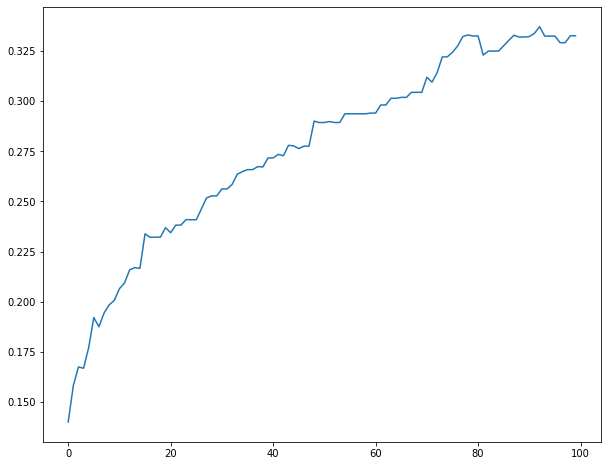

In [66]:
file = 'moead_r2-original-pareto-normalized-execution-'
time_file = 'moead_r2-execution_times.csv'
reference_point = [1.1, 1.1, 1.1, 1.1, 1.15, 1.1, 1.13, 1.1]
algorithm_folder = 'MOEAD_R2'
algorithm_name_2 = 'Off-MOEA/D'
times_2 = read_execution_times(os.path.join('Results_2020', current_test , algorithm_folder, instance, time_file))
hv_moead_r2_r050, hv_moead_r2_r050_df = plot_hypervolume_convergence(
    os.path.join('Results_2020', current_test , algorithm_folder, instance),
    folder='',
    file=file,
    reference_point=reference_point,
    dimension=8,
    plot=True)

Results_2020/tests/test17/MOEAD_R8/r100n12tw10k4/moead_r8-original-pareto-normalized-execution-0.txt
Results_2020/tests/test17/MOEAD_R8/r100n12tw10k4/moead_r8-original-pareto-normalized-execution-1.txt
Results_2020/tests/test17/MOEAD_R8/r100n12tw10k4/moead_r8-original-pareto-normalized-execution-2.txt
Results_2020/tests/test17/MOEAD_R8/r100n12tw10k4/moead_r8-original-pareto-normalized-execution-3.txt
Results_2020/tests/test17/MOEAD_R8/r100n12tw10k4/moead_r8-original-pareto-normalized-execution-4.txt
Results_2020/tests/test17/MOEAD_R8/r100n12tw10k4/moead_r8-original-pareto-normalized-execution-5.txt
Results_2020/tests/test17/MOEAD_R8/r100n12tw10k4/moead_r8-original-pareto-normalized-execution-6.txt
Results_2020/tests/test17/MOEAD_R8/r100n12tw10k4/moead_r8-original-pareto-normalized-execution-7.txt
Results_2020/tests/test17/MOEAD_R8/r100n12tw10k4/moead_r8-original-pareto-normalized-execution-8.txt
Results_2020/tests/test17/MOEAD_R8/r100n12tw10k4/moead_r8-original-pareto-normalized-execut

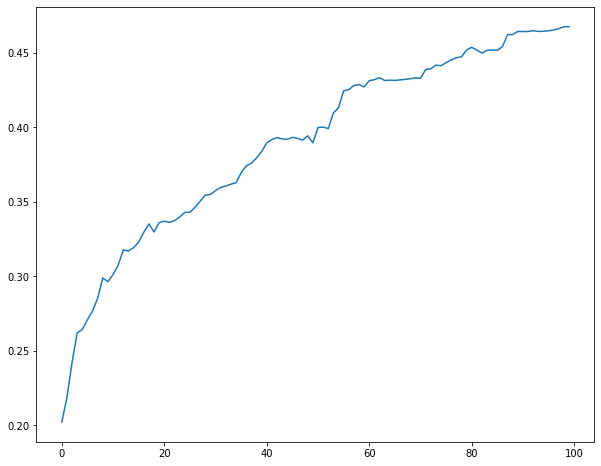

In [67]:
file = 'moead_r8-original-pareto-normalized-execution-'
time_file = 'moead_r8-execution_times.csv'
reference_point = [1.1, 1.1, 1.1, 1.15, 1.1, 1.1, 1.13, 1.1]
algorithm_folder = 'MOEAD_R8'
algorithm_name_3 = 'MOEA/D'
times_3 = read_execution_times(os.path.join('Results_2020', current_test , algorithm_folder, instance, time_file))
hv_moead_r8_r050, hv_moead_r8_r050_df = plot_hypervolume_convergence(
    os.path.join('Results_2020', current_test , algorithm_folder, instance),
    folder='',
    file=file,
    reference_point=reference_point,
    dimension=8,
    plot=True)

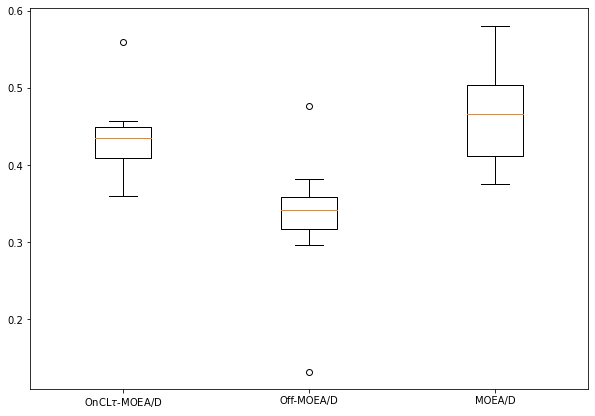

In [68]:
data_to_plot = [hv_moead_kendall_r050_df.iloc[99:].values.tolist()[0],
                hv_moead_r2_r050_df.iloc[99:].values.tolist()[0],
                hv_moead_r8_r050_df.iloc[99:].values.tolist()[0],              
               ]
plt.figure(figsize=(10, 7))
plt.boxplot(data_to_plot, labels=[algorithm_name_1,
                                  algorithm_name_2,
                                  algorithm_name_3,
                                  ])
plt.show()

In [69]:
hv_moead_kendall_r050_df

,HV0,HV1,HV2,HV3,HV4,HV5,HV6,HV7,HV8,HV9
0,0.099958,0.183562,0.155619,0.110310,0.198412,0.123757,0.128222,0.121071,0.136372,0.116455
1,0.108308,0.310857,0.176013,0.141799,0.202477,0.128838,0.167065,0.129823,0.268286,0.130973
2,0.118715,0.310857,0.176013,0.158147,0.207537,0.145782,0.183939,0.148778,0.279486,0.211323
3,0.132550,0.316516,0.176013,0.159336,0.210785,0.150693,0.190178,0.162539,0.277019,0.211323
4,0.152418,0.316516,0.223726,0.168991,0.246575,0.171924,0.204734,0.176689,0.280945,0.215043
...,...,...,...,...,...,...,...,...,...,...
95,0.373257,0.442916,0.457727,0.432312,0.397417,0.566263,0.397885,0.435514,0.441251,0.488366
96,0.373257,0.442916,0.457727,0.452918,0.397417,0.566263,0.397885,0.435514,0.441251,0.483366
97,0.373257,0.442916,0.457727,0.452918,0.397417,0.566263,0.397885,0.435514,0.455350,0.483366
98,0.373257,0.457883,0.457727,0.452918,0.397417,0.566263,0.397885,0.435514,0.455350,0.483366


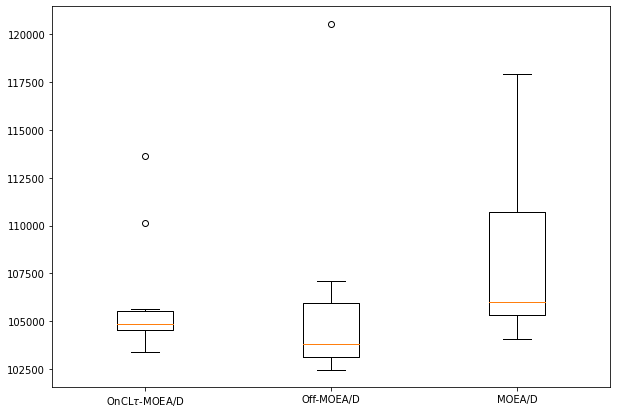

In [70]:
data_to_plot = [times_1,
                times_2,
                times_3,              
               ]
plt.figure(figsize=(10, 7))
plt.boxplot(data_to_plot, labels=[algorithm_name_1,
                                  algorithm_name_2,
                                  algorithm_name_3,
                                  ])
plt.show()

In [29]:
times_1

[106238,
 104281,
 104317,
 106817,
 113874,
 104329,
 104323,
 103578,
 105668,
 104124]

In [30]:
times_2

[110044,
 104503,
 105762,
 102829,
 104301,
 104732,
 107148,
 103061,
 100465,
 101861]

In [31]:
times_3

[119757,
 107776,
 106857,
 107256,
 105937,
 108477,
 110205,
 107786,
 103641,
 106775]

In [ ]:
[1]